In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
holidays_df = pd.read_csv("./store-sales-time-series-forecasting/holidays_events.csv")
oil_df = pd.read_csv("./store-sales-time-series-forecasting/oil.csv")
stores_df = pd.read_csv("./store-sales-time-series-forecasting/stores.csv")
transactions_df = pd.read_csv("./store-sales-time-series-forecasting/transactions.csv")
train_df = pd.read_csv("./store-sales-time-series-forecasting/train.csv")

In [3]:
len(train_df)

3000888

In [4]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
holidays_df["transferred"].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [6]:
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [7]:
#list of unique family stores

train_df["family"].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [8]:
family_stores = list(train_df["family"].unique())
print(family_stores)

['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']


In [9]:
stores_df.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [10]:
#Data must be in chronological order and timestamps should be equidistant in time series

train_df["date"] = pd.to_datetime(train_df["date"], format="%Y-%m-%d")
train_df = train_df.sort_values(by='date')
train_df["intervals"] = train_df["date"]-train_df["date"].shift(1)
train_df[["date", "intervals"]].head(50)

,date,intervals
0,2013-01-01,NaT
1194,2013-01-01,0 days
1193,2013-01-01,0 days
1192,2013-01-01,0 days
1191,2013-01-01,0 days
1190,2013-01-01,0 days
1189,2013-01-01,0 days
1188,2013-01-01,0 days
1187,2013-01-01,0 days
1186,2013-01-01,0 days


In [11]:
train_df[["date", "intervals"]].tail(50)

,date,intervals
2999682,2017-08-15,0 days
2999681,2017-08-15,0 days
2999680,2017-08-15,0 days
2999679,2017-08-15,0 days
2999678,2017-08-15,0 days
2999677,2017-08-15,0 days
2999676,2017-08-15,0 days
2999687,2017-08-15,0 days
2999675,2017-08-15,0 days
2999673,2017-08-15,0 days


In [25]:
train_df["date"].value_counts()

2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64

In [ ]:
#Let's group stock prices of the same date by summing all the values 

In [13]:
train_df["store_nbr"].value_counts()

1     55572
14    55572
18    55572
17    55572
19    55572
16    55572
15    55572
20    55572
2     55572
21    55572
11    55572
10    55572
12    55572
13    55572
42    55572
3     55572
30    55572
29    55572
28    55572
32    55572
31    55572
23    55572
24    55572
22    55572
27    55572
26    55572
33    55572
5     55572
50    55572
51    55572
41    55572
43    55572
40    55572
4     55572
45    55572
44    55572
46    55572
36    55572
35    55572
37    55572
34    55572
39    55572
38    55572
54    55572
6     55572
53    55572
52    55572
9     55572
8     55572
7     55572
48    55572
49    55572
47    55572
25    55572
Name: store_nbr, dtype: int64

In [14]:
df_first = train_df[train_df["store_nbr"] == 1]

In [15]:
df_first["onpromotion"].value_counts()

0      43663
1       3878
2       1694
3        917
4        589
       ...  
181        1
93         1
167        1
84         1
70         1
Name: onpromotion, Length: 155, dtype: int64

In [16]:
df_first = pd.DataFrame(df_first.groupby('date')['sales'].sum())

In [17]:
df_first

,sales
date,
2013-01-01,0.000000
2013-01-02,7417.148000
2013-01-03,5873.244001
2013-01-04,5919.879001
2013-01-05,6318.785010
...,...
2017-08-11,5403.742021
2017-08-12,7543.623000
2017-08-13,3902.782000


In [18]:
oil_df['year'] = pd.DatetimeIndex(oil_df['date']).year
oil_df['year'].value_counts()

2013    261
2014    261
2015    261
2016    261
2017    174
Name: year, dtype: int64

In [19]:
len(oil_df)

1218

In [27]:
oil_df["date"] = pd.to_datetime(oil_df["date"], format="%Y-%m-%d")
merged_df = df_first.merge(oil_df[['date', 'dcoilwtico']], on='date', how='left')
merged_df = merged_df.sort_values(by='date')
merged_df["intervals"] = merged_df["date"]-merged_df["date"].shift(1)
merged_df[["date", "intervals"]].head(5)

,date,intervals
0,2013-01-01,NaT
1,2013-01-02,1 days
2,2013-01-03,1 days
3,2013-01-04,1 days
4,2013-01-05,1 days


In [33]:
time_delta = dt.timedelta(days=2)
filtered_dates = merged_df.loc[merged_df["intervals"] == time_delta, "date"]
filtered_dates

358    2013-12-26
722    2014-12-26
1086   2015-12-26
1451   2016-12-26
Name: date, dtype: datetime64[ns]

In [93]:
merged_df.iloc[357]

date          2013-12-24 00:00:00
sales                    8536.046
dcoilwtico                  98.87
intervals         1 days 00:00:00
Name: 357, dtype: object

In [102]:
def insert_date(df):
    timedelta = dt.timedelta(days=1)
    filtered_dates = df.loc[df["intervals"] > timedelta, "date"]
    for index in filtered_dates.index:
        row = df.iloc[index]
        previous_date = df["date"].iloc[index - 1]
        row["date"] = previous_date + timedelta
        new_row_df = pd.DataFrame([row])
        df = pd.concat([df.iloc[:index], new_row_df, df.iloc[index:]]).reset_index(drop=True)
    df["intervals"] = df["date"]-df["date"].shift(1)
    df = df.reset_index(drop=True)
    return df

In [103]:
test_df = merged_df.copy()
print(len(test_df))
test_df = insert_date(test_df)

1684


/var/folders/vn/l33h1p5j0cvbpt731yhxy8z40000gn/T/ipykernel_3447/2446126535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["date"] = previous_date + timedelta
/var/folders/vn/l33h1p5j0cvbpt731yhxy8z40000gn/T/ipykernel_3447/2446126535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["date"] = previous_date + timedelta
/var/folders/vn/l33h1p5j0cvbpt731yhxy8z40000gn/T/ipykernel_3447/2446126535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [104]:
test_df["intervals"].value_counts()

1 days    1681
0 days       3
2 days       3
Name: intervals, dtype: int64

In [101]:
merged_df["intervals"].value_counts()

1 days    1679
2 days       4
Name: intervals, dtype: int64

In [21]:
merged_df["dcoilwtico"] = merged_df["dcoilwtico"].interpolate()
merged_df

,date,sales,dcoilwtico
0,2013-01-01,0.000000,NaN
1,2013-01-02,7417.148000,93.140000
2,2013-01-03,5873.244001,92.970000
3,2013-01-04,5919.879001,93.120000
4,2013-01-05,6318.785010,93.146667
...,...,...,...
1679,2017-08-11,5403.742021,48.810000
1680,2017-08-12,7543.623000,48.403333
1681,2017-08-13,3902.782000,47.996667
1682,2017-08-14,10433.314000,47.590000


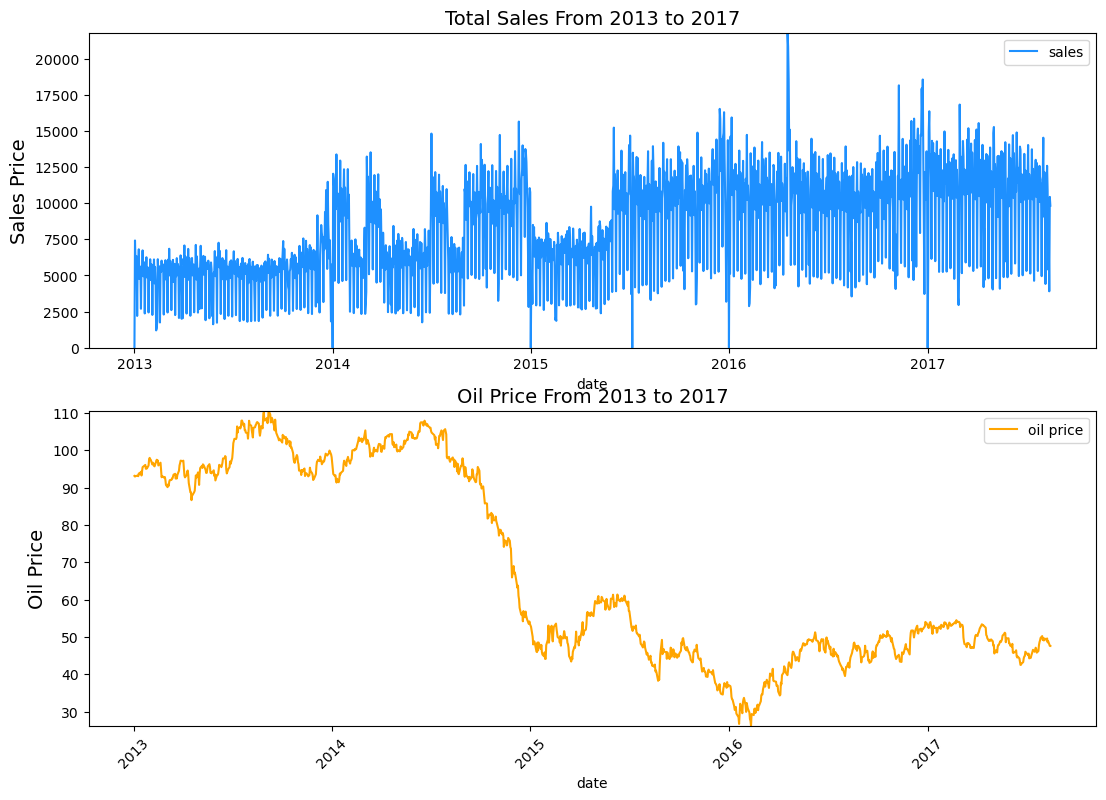

In [36]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(13, 9))

sns.lineplot(x=merged_df["date"], y=merged_df["sales"].fillna(np.inf), ax=ax[0], color='dodgerblue', label='sales')
sns.lineplot(x=merged_df["date"], y=merged_df["dcoilwtico"].fillna(np.inf), ax=ax[1], color='orange', label='oil price')

ax[0].set_title('Total Sales From 2013 to 2017', fontsize=14)
ax[0].set_ylabel(ylabel='Sales Price', fontsize=14)

# Set y-axis limits based on the range of 'dcoilwtico'
ax[0].set_ylim(merged_df["sales"].min(), merged_df["sales"].max())

ax[1].set_title('Oil Price From 2013 to 2017', fontsize=14)
ax[1].set_ylabel(ylabel='Oil Price', fontsize=14)
ax[1].set_ylim(merged_df["dcoilwtico"].min(), merged_df["dcoilwtico"].max())

plt.xticks(rotation=45)
plt.show()

In [105]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,intervals
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaT
1194,1194,2013-01-01,42,CELEBRATION,0.0,0,0 days
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0,0 days
1192,1192,2013-01-01,42,BOOKS,0.0,0,0 days
1191,1191,2013-01-01,42,BEVERAGES,0.0,0,0 days


In [106]:
train_df.isna().value_counts()

id     date   store_nbr  family  sales  onpromotion  intervals
False  False  False      False   False  False        False        3000887
                                                     True               1
dtype: int64

In [119]:
start_date = train_df.date.min()
end_date = train_df.date.max()
date_range = pd.date_range(start=start_date, end=end_date)
missing_dates = date_range.difference(train_df.date.unique())
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [129]:
def insert_missing_dates(df, missing_dates):
    stores = df.store_nbr.unique()
    families = df.family.unique()
    new_rows = []
    for date in missing_dates:
        for store in stores:
            for family in families:
                new_row = {
                    "date": date,
                    "store_nbr": store,
                    "family": family,
                    "sales": 0,
                    "onpromotion": 0,
                    "intervals": np.nan
                }
                new_rows.append(new_row)
    new_data = pd.DataFrame(new_rows)
    df = pd.concat([df, new_data], ignore_index = True)
    return df

In [130]:
def adjust_dates(df):
    df = df.sort_values(by='date')
    df['intervals'] = df['date'] - df['date'].shift(1)
    return df

In [131]:
train_data = insert_missing_dates(train_df, missing_dates)

In [132]:
date_range.difference(train_data.date.unique())

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [133]:
train_data = adjust_dates(train_data)

In [134]:
train_data["intervals"].value_counts()

0 days    3006328
1 days       1687
Name: intervals, dtype: int64

In [135]:
oil_df["date"] = pd.to_datetime(oil_df["date"], format="%Y-%m-%d")
train_data = train_data.merge(oil_df[['date', 'dcoilwtico']], on='date', how='left')

In [136]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,intervals,dcoilwtico
0,0.0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaT,NaN
1,890.0,2013-01-01,33,SEAFOOD,0.0,0,0 days,NaN
2,2.0,2013-01-01,1,BEAUTY,0.0,0,0 days,NaN
3,3.0,2013-01-01,1,BEVERAGES,0.0,0,0 days,NaN
4,4.0,2013-01-01,1,BOOKS,0.0,0,0 days,NaN
